##%% md
# K-Means Results

In [6]:
import sys
import os
import time
from sklearn.cluster import KMeans

# append parent directory to sys.path, so that the "clustering" and "data" folders are found
sys.path.append(os.path.join(os.path.abspath(''), ".."))

# Group4 implemented datasource load of Spotify dataset
import data.datasource as ds

In [9]:
def get_spotify_dataset(n_samples_per_genre):
    X, y = ds.load_X_y(
        path="../data/SpotifyFeatures.csv",
        sample_size=n_samples_per_genre,
        attribute_list=[
            "popularity",
            "acousticness",
            "danceability",
            # 'duration_ms',
            "energy",
            "instrumentalness",
            "liveness",
            "loudness",
            "speechiness",
            "tempo",
            "valence",
        ]
    )
    # get 1D array from 2D array, this is need for calculating clustering metrics
    y = y.flatten()
    return X, y

In [7]:
def get_prediction_k_means(X, n_clusters, random_state):
    start_time = time.perf_counter()
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init="auto").fit(X)
    end_time = time.perf_counter()
    return kmeans.labels_, end_time - start_time

In [10]:
random_state = 42
n_centers = 25  # with more than 100 samples from spotify dataset, 1 genre is left out
n_samples_per_genre = 500

# use the Spotify song dataset for evaluating the clustering algorithms
X, labels_true = get_spotify_dataset(n_samples_per_genre)

(12500, 1)
[[ 0]
 [ 0]
 [ 0]
 ...
 [24]
 [24]
 [24]]
(12500, 10)
[[4.73118280e-01 5.88352442e-01 4.90466444e-01 ... 1.48556876e-02
  2.80030392e-01 4.60754332e-01]
 [5.37634409e-01 8.86046267e-05 3.98901217e-01 ... 4.57342954e-02
  2.62111143e-01 3.29255861e-01]
 [5.26881720e-01 3.36322581e-02 7.36076699e-01 ... 1.01230900e-01
  4.60501675e-01 6.35066259e-01]
 ...
 [5.91397849e-01 8.76505733e-01 1.61908866e-01 ... 1.19906621e-02
  5.47026657e-01 7.54332314e-02]
 [3.01075269e-01 9.65863373e-01 5.74167834e-02 ... 1.88879457e-02
  2.49109121e-01 3.70030581e-02]
 [3.33333333e-01 2.19877677e-01 3.61197889e-01 ... 5.51782683e-03
  6.36360718e-01 1.75331295e-01]]


In [11]:
labels_pred, run_time = get_prediction_k_means(X, n_centers, random_state)

In [13]:
from sklearn import metrics
ari_score = metrics.adjusted_rand_score(labels_pred, labels_true)
ari_score

0.10420818976712086

In [15]:
from sklearn.manifold import TSNE
# We want to get TSNE embedding with 2 dimensions for 2D chart
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape

NameError: name 'y' is not defined

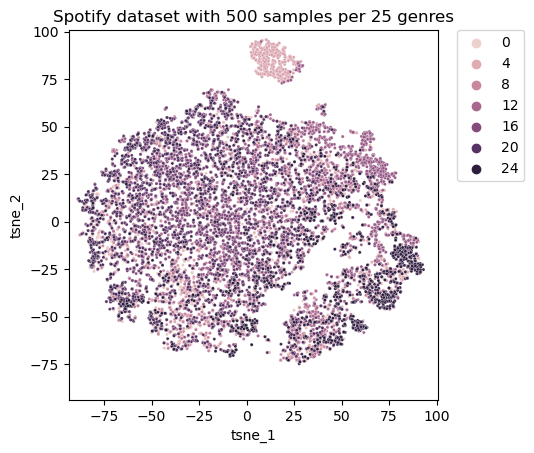

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': labels_true})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=5).set(title="Spotify dataset with 500 samples per 25 genres")
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

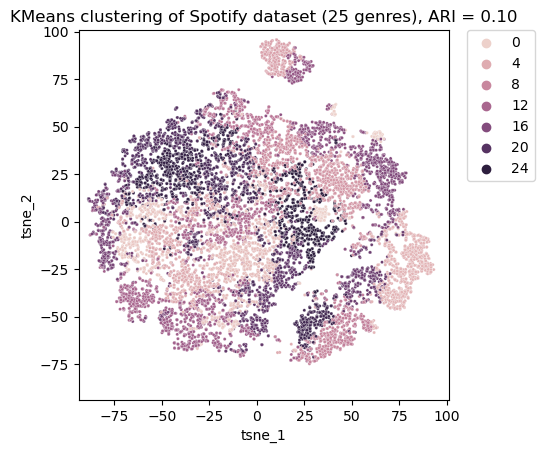

In [26]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': labels_pred})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=5).set(title="KMeans clustering of Spotify dataset (25 genres), ARI = 0.10")
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)